In [82]:
#pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import datetime
from sklearn.ensemble import RandomForestRegressor
#os.getcwd()

In [2]:
##関数
def trend_fig(timestamp, y):
    figsize = [32.0/2.57, 6.0/2.57]
    fig = plt.figure(figsize=figsize, dpi=200);
    ax = fig.add_subplot(1,1,1)
    ax.plot(timestamp, y, "-", color="blue")
    #ax.plot(training_x, prediction_y,"-", color="red")
    #ax.legend(["actual","predicted"], loc="upper right")
    plt.rcParams["font.size"] = 10
    ax.grid()
    ax.tick_params(axis='x', labelrotation=0)
    #plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=0.5)
    plt.tight_layout()
    plt.show()
    return
    #os.chdir(folder_name)
    #picturename = "sin_prediction.png"
    #plt.savefig(picturename)
    #plt.clf()
    #plt.close()
    
def RF(train_x, train_y, num_tree, random_state):
    train_x = train_x.reshape(-1, 1)
    train_y = train_y.ravel()
    mdl = RandomForestRegressor()
    mdl.n_estimators = num_tree
    mdl.random_state = random_state
    mdl.fit(train_x, train_y)
    return mdl

In [3]:
##幹線データの読み取り
data_set = pd.read_excel("/home/studio-lab-user/Sewage-trunk-line/truckline/data/幹線データ.xlsx", sheet_name="2018年7月~2020年12月")

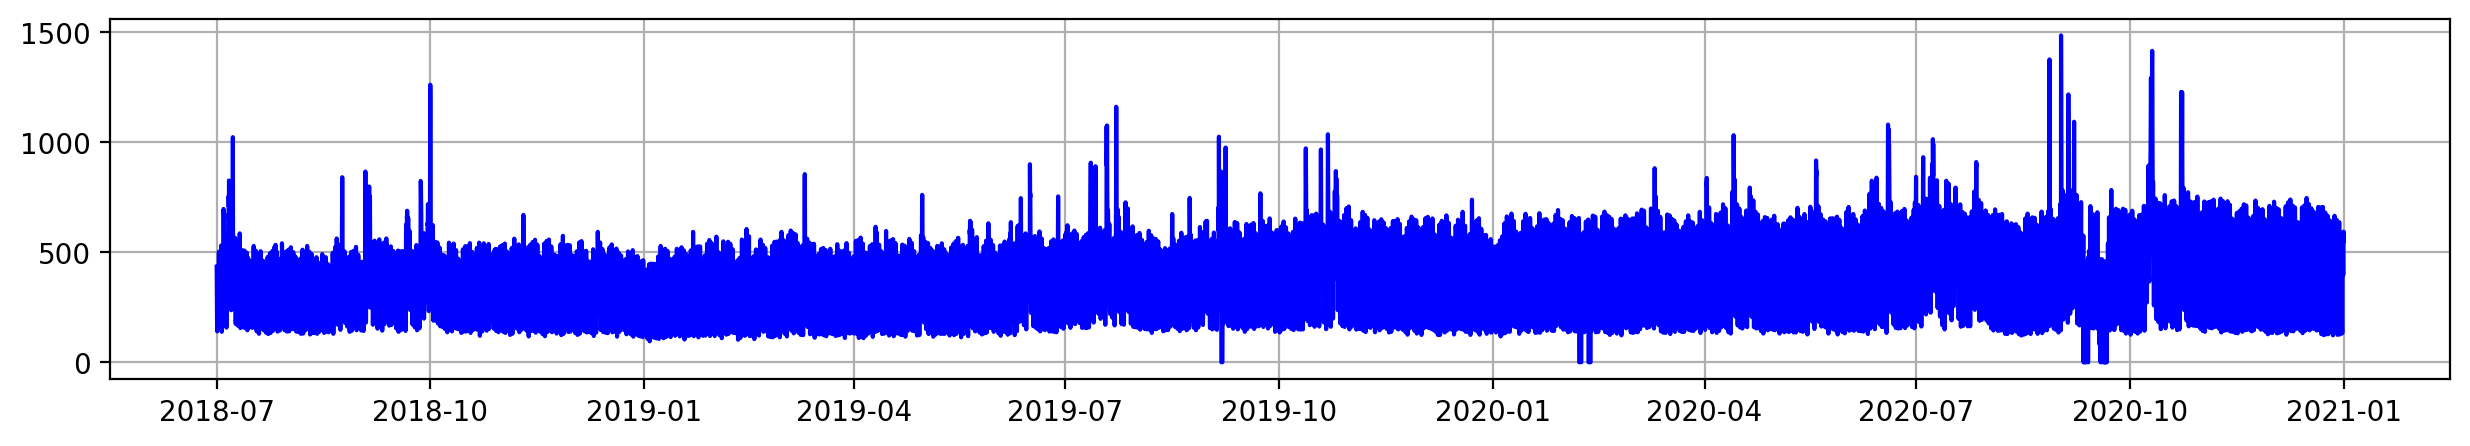

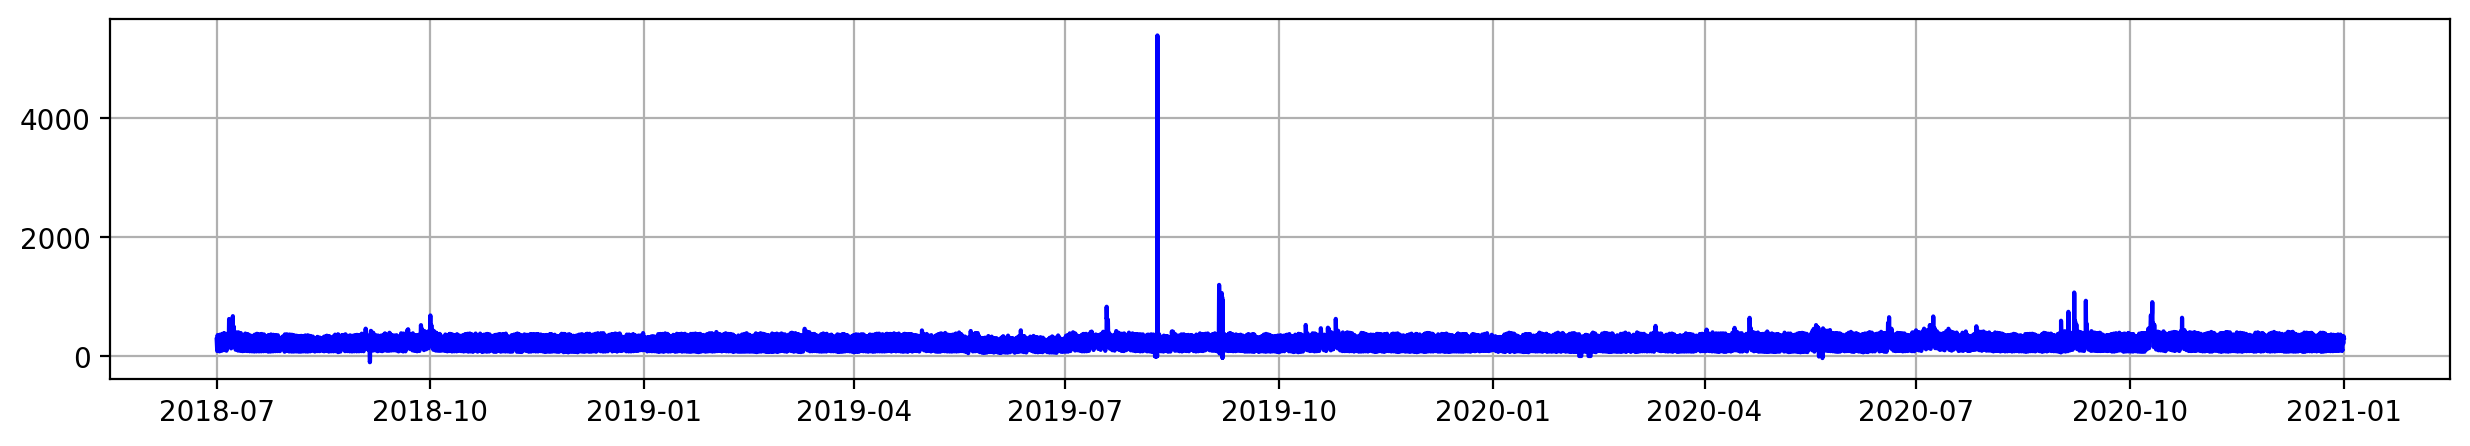

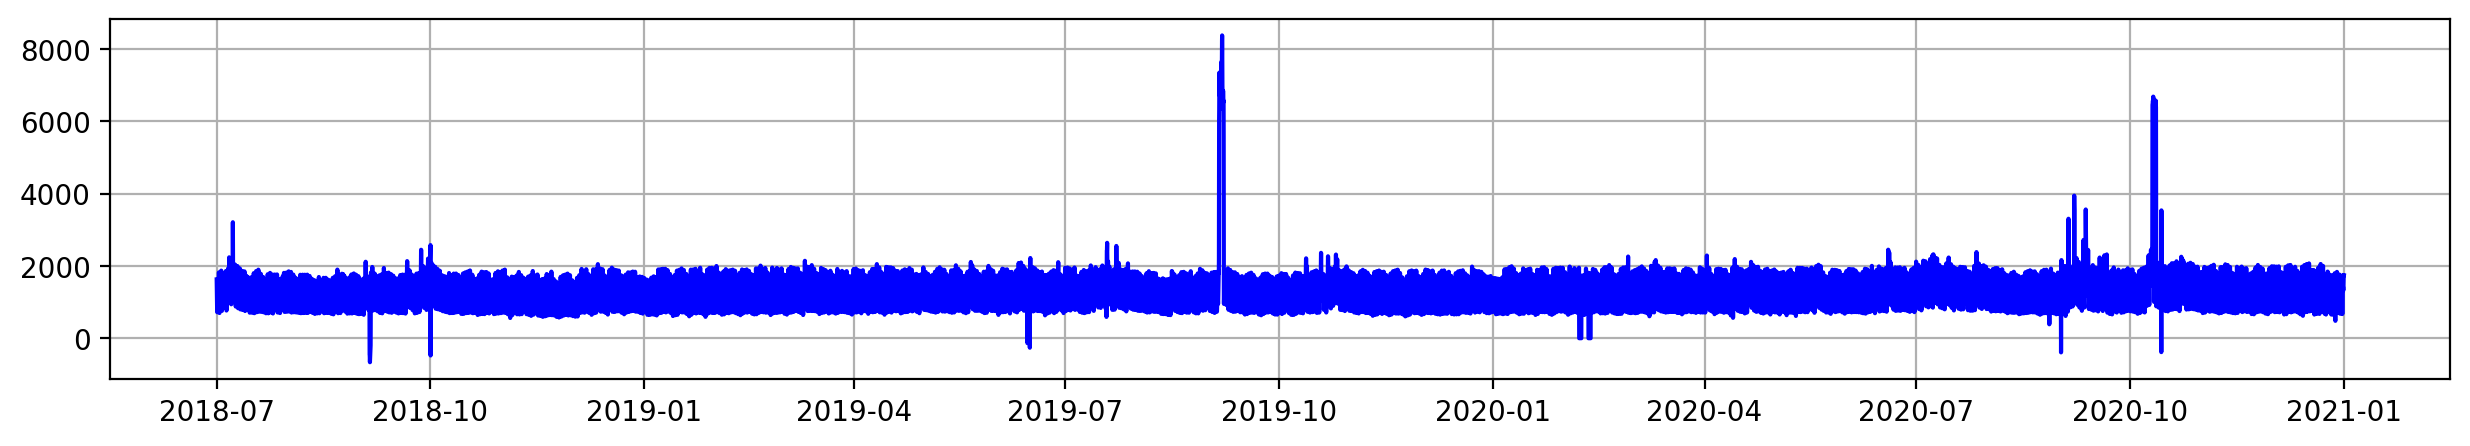

In [4]:
#各市の幹線流量
data_city = pd.DataFrame(data_set.iloc[(np.arange(5,len(data_set))),[0,14,15,16]])\
.rename(columns={"Unnamed: 0":"timestamp"}).reset_index().drop("index", axis=1)
data_city.head
#市の幹線流量のトレンド確認
trend_fig(data_city.timestamp.array, data_city.亀山市.array)
trend_fig(data_city.timestamp.array, data_city.四日市市.array)
trend_fig(data_city.timestamp.array, data_city.鈴鹿市.array)

In [8]:
data_city.head

<bound method NDFrame.head of                 timestamp 四日市市   鈴鹿市  亀山市
0     2018-07-01 01:00:00  275  1626  434
1     2018-07-01 02:00:00  230  1485  358
2     2018-07-01 03:00:00  180  1234  317
3     2018-07-01 04:00:00  124  1046  232
4     2018-07-01 05:00:00  104   904  168
...                   ...  ...   ...  ...
21955 2020-12-31 20:00:00  304  1515  524
21956 2020-12-31 21:00:00  328  1677  593
21957 2020-12-31 22:00:00  331  1745  568
21958 2020-12-31 23:00:00  321  1723  571
21959 2021-01-01 00:00:00  310  1739  552

[21960 rows x 4 columns]>

In [6]:
##気象実績データの読み取り
home = "/home/studio-lab-user/"
weather_path = home + "Sewage-trunk-line/data/気温・降雨量・湿度データ（四日市、亀山、鈴鹿）.xlsx"
weather_temp = pd.read_excel(weather_path, sheet_name="気温")
weather_rain = pd.read_excel(weather_path, sheet_name="降雨量")
weather_hum = pd.read_excel(weather_path, sheet_name="湿度（四日市のみ）")

weather_temp = weather_temp.iloc[(np.arange(5,len(weather_temp))), [0,1,4,7]].reset_index().drop("index", axis=1)
weather_temp.columns = ["timestamp", "四日市市", "亀山市", "鈴鹿市"]
weather_rain = weather_rain.iloc[(np.arange(5,len(weather_rain))), [0,1,5,8]].reset_index().drop("index", axis=1)
weather_rain.columns = ["timestamp", "四日市市", "亀山市", "鈴鹿市"]
weather_hum = weather_hum.iloc[(np.arange(5,len(weather_hum))), [0,1]].reset_index().drop("index", axis=1)
weather_hum.columns = ["timestamp", "四日市市"]

In [7]:
print(weather_temp.head(),\
weather_rain.head(),\
weather_hum.head())

             timestamp  四日市市   亀山市   鈴鹿市
0  2018-07-01 01:00:00  24.8    25  25.1
1  2018-07-01 02:00:00  24.4    25  24.8
2  2018-07-01 03:00:00  24.3  24.9  24.4
3  2018-07-01 04:00:00  24.3  24.9  24.3
4  2018-07-01 05:00:00  24.3  24.6  24.3              timestamp 四日市市 亀山市 鈴鹿市
0  2018-07-01 01:00:00    0   0   0
1  2018-07-01 02:00:00    0   0   0
2  2018-07-01 03:00:00    0   0   0
3  2018-07-01 04:00:00    0   0   0
4  2018-07-01 05:00:00    0   0   0              timestamp 四日市市
0  2018-07-01 01:00:00  100
1  2018-07-01 02:00:00  100
2  2018-07-01 03:00:00  100
3  2018-07-01 04:00:00  100
4  2018-07-01 05:00:00  100


In [ ]:
##時刻ステップ
datetime.time()

In [67]:
##気象予報データの読み取り
temp_path = home + "Sewage-trunk-line/truckline/data/予報データ（気温）_12 intervals.xlsx"
rain_path = home + "Sewage-trunk-line/truckline/data/予報データ（降水量）_12 intervals.xlsx"
hum_path = home + "Sewage-trunk-line/truckline/data/予報データ（湿度）_12 intervals.xlsx"
sheet_name_temp = ["201905-201909_気温連続データ", "202005-202009_気温連続データ"]
sheet_name_rain = ["201905-201909_降水量連続データ", "202005-202009_降水量連続データ"]
sheet_name_hum = ["201905-201909_湿度連続データ", "202005-202009_湿度連続データ"]
temp_set_a = pd.read_excel(temp_path, sheet_name=sheet_name_temp[0]).drop("予報基準時刻", axis=1)
rain_set_a = pd.read_excel(rain_path, sheet_name=sheet_name_rain[0]).drop("予報基準時刻", axis=1)
hum_set_a = pd.read_excel(hum_path, sheet_name=sheet_name_hum[0]).drop("予報基準時刻", axis=1)
temp_set_b = pd.read_excel(temp_path, sheet_name=sheet_name_temp[1]).drop("予報基準時刻", axis=1)
rain_set_b = pd.read_excel(rain_path, sheet_name=sheet_name_rain[1]).drop("予報基準時刻", axis=1)
hum_set_b = pd.read_excel(hum_path, sheet_name=sheet_name_hum[1]).drop("予報基準時刻", axis=1)

In [197]:
##nan処理
array_nan = data_city.isnull().any(axis=1) + weather_temp.isnull().any(axis=1) + weather_rain.isnull().any(axis=1) + weather_hum.isnull().any(axis=1)
print(data_city[array_nan].index)
timestamp_all = data_city["timestamp"].drop(index = data_city[array_nan].index, axis=1)
y_all = data_city["亀山市"].drop(index = data_city[array_nan].index, axis=1)
print(len(data_city[array_nan].index))
print(len(test_t))
print(len(data_city))
print(y_all)
#train_x = pd.concat([weather_temp["亀山市"], weather_rain["亀山市"]], axis=1).dropna(axis=0)
#train_y = data_city[data_city.timestamp == ]
#mdl = RF(train_x, data_city.亀山市.array, 300, 100)
#train_x

Int64Index([ 1578,  1579,  1584,  1585,  1586,  1587,  1588, 13713, 13714,
            13715, 15963, 15964, 17890, 21417, 21418, 21419, 21420, 21421,
            21422, 21423],
           dtype='int64')
20
21940
21960
0        434
1        358
2        317
3        232
4        168
        ... 
21955    524
21956    593
21957    568
21958    571
21959    552
Name: 亀山市, Length: 21940, dtype: object


In [81]:
##学習・検証期間の設定
#評価期間a：2019年5月1日 ～ 2019年10月1日
#評価期間b：2020年5月1日 ～ 2020年9月29日
test_time_a = temp_set_a.予報日
test_time_b = temp_set_b.予報日
print(test_time_a)
data_city[data_city.timestamp <= (test_time_a[0] + datetime.timedelta(hours=-12))].timestamp

0      2019-05-01 10:00:00
1      2019-05-01 11:00:00
2      2019-05-01 12:00:00
3      2019-05-01 13:00:00
4      2019-05-01 14:00:00
               ...        
3667   2019-10-01 05:00:00
3668   2019-10-01 06:00:00
3669   2019-10-01 07:00:00
3670   2019-10-01 08:00:00
3671   2019-10-01 09:00:00
Name: 予報日, Length: 3672, dtype: datetime64[ns]


0      2018-07-01 01:00:00
1      2018-07-01 02:00:00
2      2018-07-01 03:00:00
3      2018-07-01 04:00:00
4      2018-07-01 05:00:00
               ...        
7289   2019-04-30 18:00:00
7290   2019-04-30 19:00:00
7291   2019-04-30 20:00:00
7292   2019-04-30 21:00:00
7293   2019-04-30 22:00:00
Name: timestamp, Length: 7294, dtype: datetime64[ns]

2